In [45]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC 
import numpy as np
import matplotlib.pyplot as plt         
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [68]:
iris = load_iris()
X_iris = iris.data[:, :2] 
y_iris = iris.target
(X_train, X_test, y_train, y_test ) = train_test_split(X_iris, y_iris, stratify=y_iris, test_size= 0.3, random_state=78)


In [79]:
#Create estimator class
estimator =SVC(kernel='linear')

#Create param grid
paramgrid = [{'C':[0.001,0.1,1,5,10]}]

#Create SearchGridCV optimizer
optimizer = GridSearchCV(estimator, paramgrid, cv=10, scoring= "accuracy")

#Fit it for original data
optt=optimizer.fit(X_train, y_train)
y_pred = optt.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

In [80]:
 print(classification_report(y_test, y_pred, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       1.00      0.93      0.97        15
 versicolor       0.73      0.73      0.73        15
  virginica       0.75      0.80      0.77        15

avg / total       0.83      0.82      0.82        45



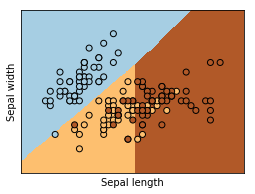

In [81]:
x_min, x_max = X_iris[:, 0].min() - .5, X_iris[:, 0].max() + .5
y_min, y_max = X_iris[:, 1].min() - .5, X_iris[:, 1].max() + .5
h = .02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

y_pred = optt.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
y_pred = y_pred.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, y_pred, cmap=plt.cm.Paired)


# Plot also the training points
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.show()